# Calculando o score Silhouette

In [1]:
#Importamos os pacotes
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
#Generamos data aleatoria
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z = np.concatenate((X,Y))
df = pd.DataFrame(Z,columns=['x','y'])
df.head()

,x,y
0,0.986409,0.862112
1,0.869778,0.356344
2,0.693938,0.253669
3,0.511963,0.734516
4,0.297668,0.472632


<Axes: xlabel='x', ylabel='y'>

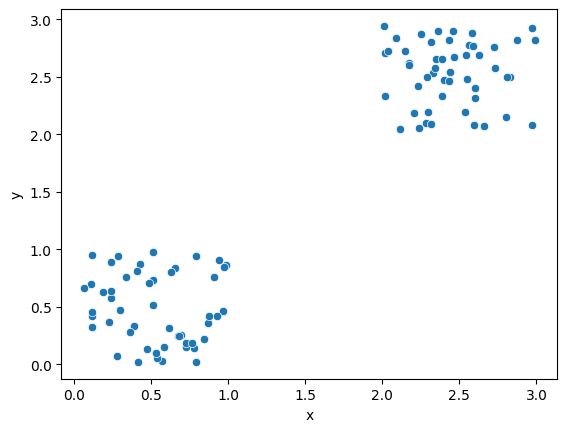

In [3]:
sns.scatterplot(df,x='x',y='y')

In [5]:
#Aplicamos K-Means com 2 clusters
KMean = KMeans(n_clusters=2,n_init='auto')
KMean.fit(df)
label=KMean.predict(df)

C:\Users\gusta\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
#Calculamos o Índice de Silhouette
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

Silhouette Score(n=2): 0.8197207424622109


**Insight**

Podemos dizer que os grupos estão bem separados uns dos outros, pois a métrica Silhouette nos dá um resultado próximo de 1. No entanto, para verificar se nossa pontuação de silhueta fornece as informações corretas ou não, podemos criar outro gráfico de dispersão que mostre os dados rotulados pontos como mostrado abaixo:

<Axes: xlabel='x', ylabel='y'>

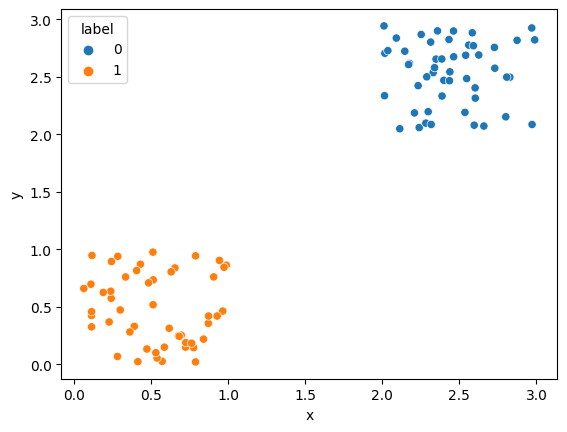

In [7]:
df['label'] = label
sns.scatterplot(df,x='x',y='y',hue='label')

Como podemos ver, vê-se claramente na figura anterior que cada grupo está muito separado um do outro. Isso significa que o valor obtido para o índice Silhouette deverá ser próximo de 1.

Vamos tentar com 3 clusters para ver o que acontece agora...

In [17]:
KMean= KMeans(n_clusters=3,n_init='auto')
KMean.fit(Z)
label2=KMean.predict(Z)

C:\Users\gusta\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
#Calculamos o Índice de Silhouette
print(f'Silhouette Score(n=3): {silhouette_score(Z, label2)}')

Silhouette Score(n=3): 0.6307137208520789


<Axes: xlabel='x', ylabel='y'>

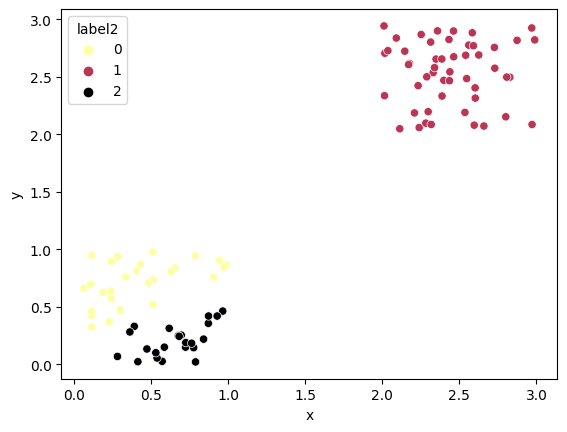

In [19]:
#Plots
df['label2'] = label2
sns.scatterplot(df,x='x',y='y',hue='label2',palette='inferno_r')

**Aplicações**
Como podemos ver na figura anterior, os grupos não estão bem separados. A distância intergrupo entre o grupo 1 e o grupo 2 é quase insignificante. É por isso que a pontuação da silhueta para n = 3 é menor do que para n = 2.

Quando se trata de dimensões superiores, a pontuação da silhueta é bastante útil para validar o funcionamento do algoritmo de agrupamento, pois não podemos utilizar nenhum tipo de visualização para validar o agrupamento quando as dimensões são maiores que 3.

Também podemos usar a pontuação da silhueta para verificar o número ideal de clusters. No exemplo acima, podemos dizer que o número ideal de clusters é 2, pois sua pontuação de silhueta é maior que a de 3 clusters.